# 计算cpk并绘图

## 导入使用到的modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


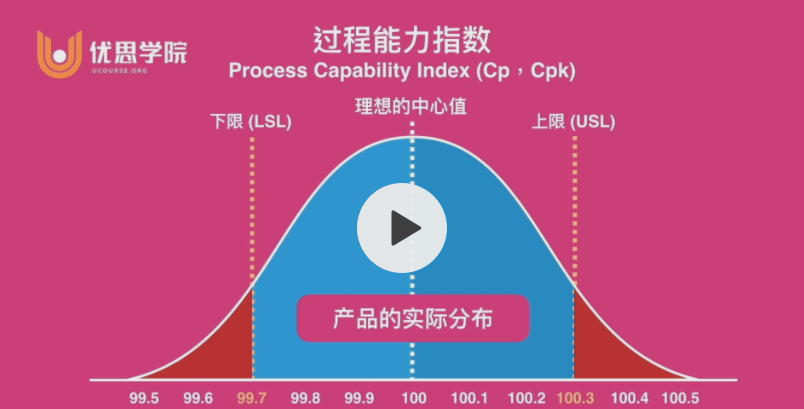

## cpk曲线的计算方法

### 横轴：

np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

在指定的间隔内返回均匀间隔的数字

x1 = np.linspace(std - sigma * stdev-0.5, syd + sigma * stdev + 0.5, 1000)

横轴指定的数值区间： 读数的范围取标准值std ±（3sigma + 0.5），均匀取1000个数；

### 纵轴计算正态分布曲线

y1 = np.exp(-(x1 - u) ** 2 / (2 * stdev ** 2)) / (math.sqrt(2 * math.pi) * stdev)

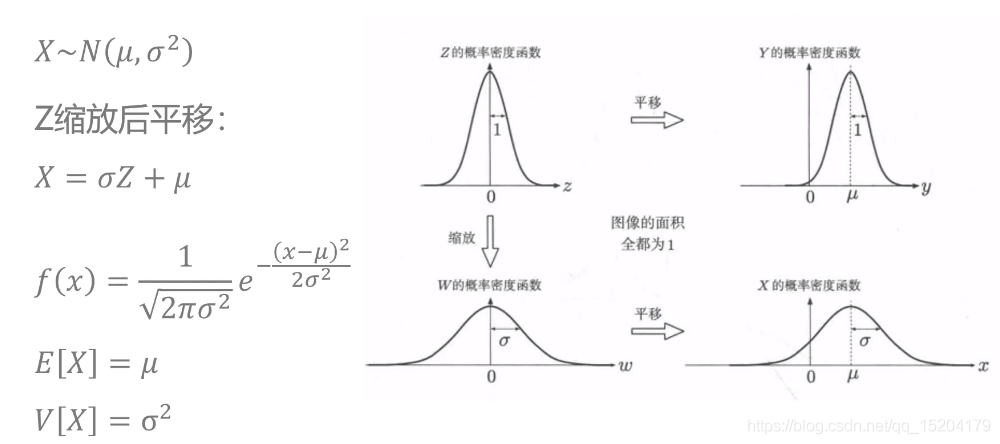
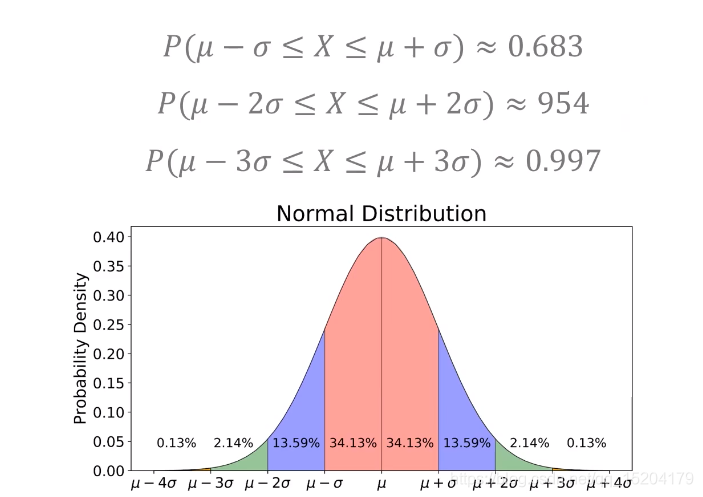

## 定义计算cpk和绘图的函数

In [2]:
def cpk_calc(df_data: pd.DataFrame, usl, lsl,std):
    """
    :param df_data: 数据dataframe
    :param usl: 数据指标上限
    :param lsl: 数据指标下限
    :return:
    """
    title = None
    legendlist = []
    
    sigma = 3
    
    # 若下限为0, 则使用上限反转负值替代
    if int(lsl) == 0:
        lsl = 0 - usl
 
    # 数据平均值
    #print(df_data.mean())
    s = df_data.mean()

    #print(s.index)
    #print(s.values)
    #u = df_data.mean()[serialTitle]
    plt.figure(figsize=(15,10))
    
    for i in range(len(s.values)):
        serialTitle = s.index[i]
        u = s.values[i]
        
        #print('mean',u)

        # 数据标准差
        stdev = np.std(df_data[serialTitle].values, ddof=1)
        #print('stdev',stdev)

        # 生成横轴数据平均分布
        #x1 = np.linspace(u - sigma * stdev, u + sigma * stdev, 1000)
        x1 = np.linspace(std - sigma * stdev-0.5, std + sigma * stdev + 0.5, 1000)

        # 计算正态分布曲线
        y1 = np.exp(-(x1 - u) ** 2 / (2 * stdev ** 2)) / (math.sqrt(2 * math.pi) * stdev)
        
        # 得出cpk
        cpu = (usl - u) / (sigma * stdev)
        cpl = (u - lsl) / (sigma * stdev)       
        cpk = min(cpu, cpl)

        # 使用matplotlib画图
        plt.xlim(x1[0] - 0.499, x1[-1] + 0.501)
        #plt.xlim(lsl - 0.5, usl + 0.5)
        #plt.xlim(lsl - 0.5, usl + 0.5)
        
        plt.plot(x1, y1)
        #plt.hist(df_data.values, 15, density=True)   # bar
        if title is None:  #{:20}\t{:28}\t{:32}
            title = "{:<10} :CPK={:<15},mean = {:.2f},stdev = {:.6f}\n".format(serialTitle,cpk,u,stdev)
        else:
            title = title + ("{:<10} :CPK={:<15},mean = {:.2f},stdev = {:.6f}\n".format(serialTitle,cpk,u,stdev))
            
        plt.title(title)
        legendlist.append(serialTitle)
        #plt.axvline(x1[np.argmax(y1)], color='gray', linestyle='--',label = 'max')  # 
        plt.vlines([x1[np.argmax(y1)]],ymin = 0,ymax = y1[np.argmax(y1)], color='gray', linestyle='--')  # 
        #legendlist.append(None)
        
    plt.axvline(usl, color='r', linestyle='--', label='USL')
    legendlist.append('USL')
    
    plt.axvline(lsl, color='r', linestyle='--', label='LSL')
    legendlist.append('LSL')
    
    plt.axvline(std, color='r', linestyle='--', label='STD')   
    legendlist.append('STD')
    
    plt.axvline(std - sigma * stdev, color='blue', linestyle='--', label='-3 Sigma')
    legendlist.append('-3 Sigma')
    
    plt.axvline(std + sigma * stdev, color='blue', linestyle='--', label='3 Sigma')
    legendlist.append('3 Sigma')
    
    plt.legend(legendlist)
    #plt.xlabel('reading')
    plt.ylabel('Probability Density')
    
    plt.savefig('cpk1.png',bbox_inches='tight')

    plt.show()
        
        


## 导入待处理的数据

In [4]:
xlsx_file = "cpkdata.xlsx"
"""
# read_excel方法读取文件
xlsx_feature = pd.read_excel(xlsx_file, usecols=[1, 2, 3, 4, 5, 6, 7]) 
#usecols属性读取excel文件中的指定列，列号从0起始；skiprows属性跳过excel文件中指定行，行号从0起始

"""
# read_excel方法返回类型为DataFrame，不需要再次转换
feature = pd.read_excel(xlsx_file, usecols=[1, 2, 3, 4, 5,6])
#print(type(feature))
print(feature)

    ambient    18c    28c  aftercycle  storage20  storage60
0     950.2  949.8  947.0       948.7      946.9      947.7
1     949.2  949.2  949.1       951.6      951.1      950.3
2     948.3  950.3  948.4       948.8      951.4      948.8
3     947.5  949.6  947.7       949.7      950.1      949.5
4     948.7  949.9  947.9       949.3      948.1      949.0
5     948.4  948.1  949.6       950.1      949.0      950.6
6     948.7  948.9  947.2       950.2      949.0      950.6
7     948.5  948.5  946.6       950.1      949.7      948.4
8     948.3  951.0  947.5       951.9      948.5      948.2
9     948.2  948.5  947.2       951.3      945.8      949.3
10    949.4  949.6  949.0       950.3      951.0      949.0
11    948.4  948.9  945.9       950.4      951.8      950.2
12    947.6  950.7  947.9       947.0      948.9      948.7
13    948.4  950.5  949.4       949.0      950.4      948.1
14    950.0  948.4  948.8       949.4      951.2      948.9
15    949.5  950.0  948.7       951.6   

## 处理数据并 生成cpk曲线

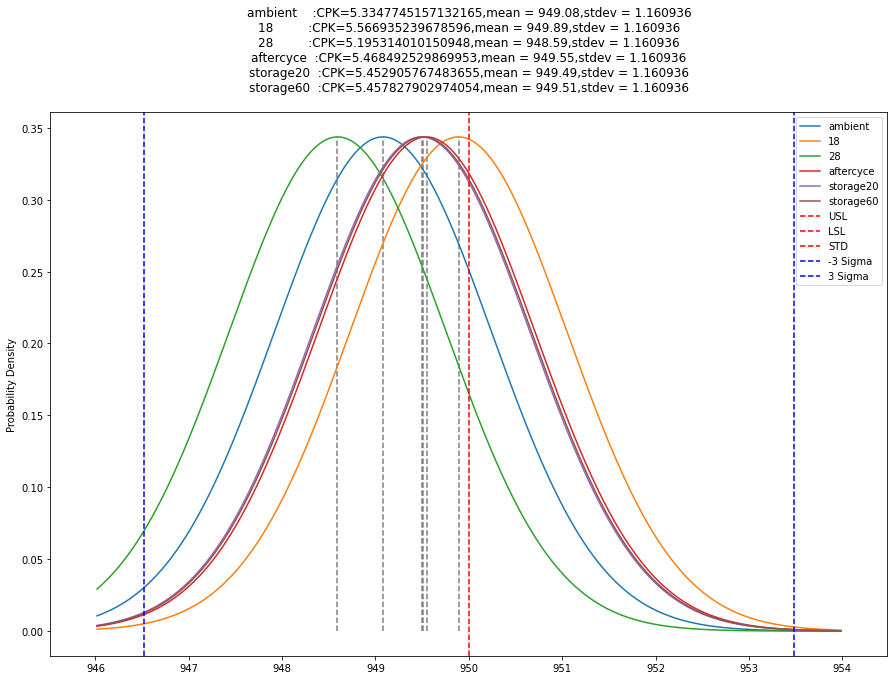

In [37]:
usl = 969.5
lsl = 930.5
std = 950
cpk_calc(feature,usl,lsl,std)



## Y轴的意义：

正态分布曲线Y轴表示的是随机变量x等于某数发生的概率。

正态曲线下横轴上一定区间的**面积**反映该区间的例数占总例数的百分比，或变量值落在该区间的概率（概率分布）。不同范围内正态曲线下的面积可用公式计算。

 ### 1 Sigma：
    横轴区间(μ-σ,μ+σ)内的面积为**68.268949%** ；（读数落入该区间的概率为68.2689%）
    P{|X-μ|<σ}=2Φ(1)-1=0.6826。

 ### 2 Sigma：
    横轴区间(μ-1.96σ,μ+1.96σ)内的面积为**95.449974%**；（读数落入该区间的概率为95.4499%）
    P{|X-μ|<2σ}=2Φ(2)-1=0.9544。

 ### 3 Sigma：
    横轴区间(μ-2.58σ,μ+2.58σ)内的面积为99.730020%。
    P{|X-μ|<3σ}=2Φ(3)-1=0.9974。



In [27]:
import sys


print(sys.version)
print(sys.version_info)
sys.version_info.major

3.9.1 (tags/v3.9.1:1e5d33e, Dec  7 2020, 17:08:21) [MSC v.1927 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=1, releaselevel='final', serial=0)


3